In [1]:
from sensLsipmtimingmethods.delayfunctions import *
import numpy as np

In [49]:
def histogramCalc(data, small_length, length, plot=True): 
    
    # Grab the data
    data.columns
    pulse1 = np.array(data['X at Max Y(1)'])
    pulse2 = np.array(data['X at Max Y(4)'])

    
    # delete the largest argument from both datasets
    argument1 = np.where(pulse1 > np.quantile(pulse1, 0.99))
    argument3 = np.where(pulse1 < np.quantile(pulse1,0.01))
    argument2 = np.where(pulse2 > np.quantile(pulse2, 0.99))
    argument4 = np.where(pulse2 < np.quantile(pulse2,0.01))
    
    del_args = np.append(argument1, np.append(argument2, np.append(argument3, argument4)))
    #print(del_args)
    
    pulse1_clean = np.delete(pulse1, del_args)

    pulse2_clean = np.delete(pulse2, del_args)

    # create an array of the difference between the new datasets
    time_delays = []
    for i in range(len(pulse1_clean)):
        time_delays.append(pulse1_clean[i] - pulse2_clean[i])

        
    time_delays = np.array(time_delays)
    
    #del_args = np.where(e > np.quantile(e, 0.999))
    #e = np.delete(e, del_args)
    
    #print(e)
    #print(len(e))

    # Create plot
    if(plot == True):
        plt.xlabel("DELAY. SGB-BCF92. " + str(small_length) + "mm")
        plt.ylabel("Frequency")
        #vx = np.random.gamma(4, 0.5, 1000) idk what this is for
        plt.axvline(time_delays.mean(),color='k', linestyle='dashed', linewidth=1)

        mu, std = norm.fit(time_delays) # find the mean & std of the data fitted to a norm. dist.

        plt.hist(time_delays, density=True, alpha=0.6, color='b')

        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)

        plt.plot(x, p, 'k', linewidth=2)
        title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)

        plt.show()

        mean_rounded = "{:.3f}".format((np.mean(time_delays)) * 10 ** 9)
        sr_rounded = "{:.3f}".format((np.std(time_delays)) * 10 ** 9)
        median_rounded = "{:.3f}".format((np.median(time_delays)) * 10 ** 9)

        mean = "Mean: " + str(mean_rounded) + " ns"
        SD = "Standard Deviation: " + str(sr_rounded) + " ns"
        median = "Median: " + str(median_rounded) + " ns"

        print(mean)
        print(SD)
        print(median)
    return time_delays
    #return a,b,c,d,e

In [50]:
# snsl data
sensl = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 20 cm/SNSL_sipm_delay_20_2.csv')
broadcom = pd.read_csv("tests/XaM_DEL_SGB-BCF-1-2_R1.csv")

In [51]:
sensl_delays = histogramCalc(sensl, 1200, 3000, False)
broadcom_delays = histogramCalc(broadcom, 1200, 3000, False)
sensl_trace = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 20 cm/SNSL_sipm_trace_20_3', 20, 0.7, plot=False)


In [52]:
def comparison_plot(sensl, broadcom, sensl_trace):
    plt.hist(sensl, density=True, alpha=0.6, color='pink', label = 'SensL')

    mu_s, std_s = norm.fit(sensl) 
    xmin_s, xmax_s = plt.xlim()
    x_s = np.linspace(xmin_s, xmax_s, 100)
    p_s = norm.pdf(x_s, mu_s, std_s)
    plt.plot(x_s, p_s, 'k', linewidth=2)

    print("SensL Statistics:\nMean:", np.round(np.mean(sensl) * 10 ** 9, 3), "ns\nStandard Dev.:", np.round(np.std(sensl) * 10 ** 9, 3), "ns\n")

    plt.hist(broadcom, density=True, alpha=0.6, color='purple', label = 'Broadcom')

    mu_b, std_b = norm.fit(broadcom) 
    xmin_b, xmax_b = plt.xlim()
    x_b = np.linspace(xmin_b, xmax_b, 100)
    p_b = norm.pdf(x_b, mu_b, std_b)
    plt.plot(x_b, p_b, 'k', linewidth=2)
    print("Broadcom Statistics:\nMean:", np.round(np.mean(broadcom) * 10 ** 9, 3), "ns\nStandard Dev.:", np.round(np.std(broadcom) * 10 ** 9, 3))

    plt.hist(sensl_trace, density=True, alpha=0.6, color='blue', label = 'SensL (CDF)')

    mu_st, std_st = norm.fit(sensl_trace) 
    xmin_st, xmax_st = plt.xlim()
    x_st = np.linspace(xmin_st, xmax_st, 100)
    p_st = norm.pdf(x_st, mu_st, std_st)
    plt.plot(x_st, p_st, 'k', linewidth=2)

    print("\nSensL Statistics (CFD):\nMean:", np.round(np.mean(sensl_trace) * 10 ** 9, 3), "ns\nStandard Dev. (CFD):", np.round(np.std(sensl_trace) * 10 ** 9, 3), "ns\n")


    
    plt.title("SensL vs. Broadcom SiPM time delays")

    plt.xlabel('Time (s)')
    plt.ylabel('Frequency')
    
    plt.legend()
    plt.show()
    print("Difference in time delay std: ", abs(np.round((np.std(sensl) - np.std(broadcom)) * 10 ** 9, 3)), "ns")
    

SensL Statistics:
Mean: -15.193 ns
Standard Dev.: 1.295 ns

Broadcom Statistics:
Mean: -13.068 ns
Standard Dev.: 0.707

SensL Statistics (CFD):
Mean: -14.982 ns
Standard Dev. (CFD): 0.377 ns



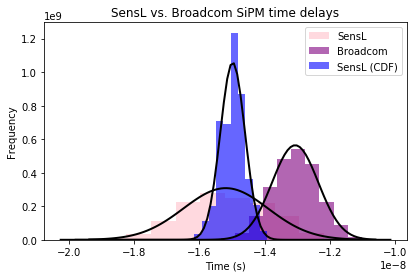

Difference in time delay std:  0.588 ns


In [53]:
comparison_plot(sensl_delays, broadcom_delays,sensl_trace)

SensL Statistics:
Mean: -12.738 ns
Standard Dev.: 1.121 ns

Broadcom Statistics:
Mean: -10.234 ns
Standard Dev.: 0.628

SensL Statistics (CFD):
Mean: -12.663 ns
Standard Dev. (CFD): 0.386 ns



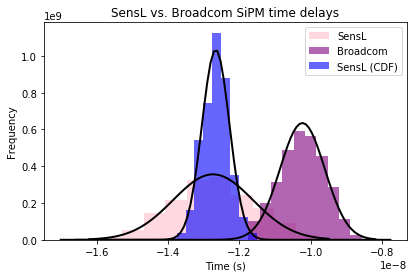

Difference in time delay std:  0.493 ns


In [43]:
sensl_40 = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 40 cm/SNSL_sipm_delay_40_3.csv')
broadcom_40 = pd.read_csv("SGB BCF 9929 1-2/XaM_DEL_SGB-BCF-1-2_R2.csv")
sensl_trace_40 = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 40 cm/SNSL_sipm_trace_40_3', 20, 0.7, plot=False)

sensl_delays_40 = get_timing_delays_leadingedge(sensl_40, 1200, 3000, False)
broadcom_delays_40 = get_timing_delays_leadingedge(broadcom_40, 1200, 3000, False)
comparison_plot(sensl_delays_40, broadcom_delays_40, sensl_trace_40)

SensL Statistics:
Mean: -10.376 ns
Standard Dev.: 1.373 ns

Broadcom Statistics:
Mean: -7.012 ns
Standard Dev.: 0.724

SensL Statistics (CFD):
Mean: -10.253 ns
Standard Dev. (CFD): 0.393 ns



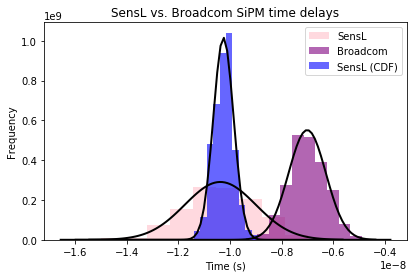

Difference in time delay std:  0.65 ns


In [44]:
sensl_60 = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 60 cm/SNSL_sipm_delay_60_3.csv')
broadcom_60 = pd.read_csv("SGB BCF 9929 1-2/XaM_DEL_SGB-BCF-1-2_R3.csv")
sensl_trace_60 = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 60 cm/SNSL_sipm_trace_60_3', 20, 0.7, plot=False)



sensl_delays_60 = histogramCalc(sensl_60, 1200, 3000, False)
broadcom_delays_60 = histogramCalc(broadcom_60, 1200, 3000, False)
comparison_plot(sensl_delays_60, broadcom_delays_60, sensl_trace_60)

SensL Statistics:
Mean: -8.202 ns
Standard Dev.: 1.303 ns

Broadcom Statistics:
Mean: -3.556 ns
Standard Dev.: 0.836

SensL Statistics (CFD):
Mean: -8.173 ns
Standard Dev. (CFD): 0.423 ns



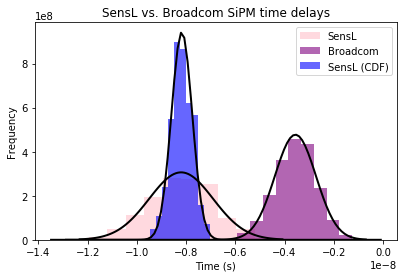

Difference in time delay std:  0.467 ns


In [46]:
sensl_80 = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 80 cm/SNSL_sipm_delay_80_3.csv')
broadcom_80 = pd.read_csv("SGB BCF 9929 1-2/XaM_DEL_SGB-BCF-1-2_R4.csv")
sensl_trace_80 = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 80 cm/SNSL_sipm_trace_80_3', 20, 0.7, plot=False)



sensl_delays_80 = histogramCalc(sensl_80, 1200, 3000, False)
broadcom_delays_80 = histogramCalc(broadcom_80, 1200, 3000, False)
comparison_plot(sensl_delays_80, broadcom_delays_80, sensl_trace_80)

SensL Statistics:
Mean: -6.072 ns
Standard Dev.: 1.325 ns

Broadcom Statistics:
Mean: -0.377 ns
Standard Dev.: 0.684

SensL Statistics (CFD):
Mean: -6.04 ns
Standard Dev. (CFD): 0.412 ns



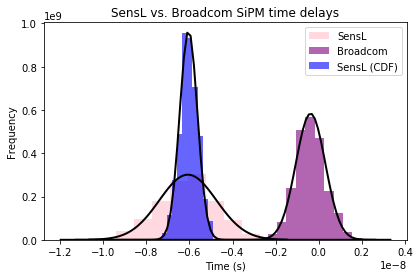

Difference in time delay std:  0.642 ns


In [47]:
sensl_100 = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 100 cm/SNSL_sipm_delay_100_3.csv')
broadcom_100 = pd.read_csv("SGB BCF 9929 1-2/XaM_DEL_SGB-BCF-1-2_R5.csv")
sensl_trace_100 = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 100 cm/SNSL_sipm_trace_100_3', 20, 0.7, plot=False)

sensl_delays_100 = histogramCalc(sensl_100, 1200, 3000, False)
broadcom_delays_100 = histogramCalc(broadcom_100, 1200, 3000, False)
comparison_plot(sensl_delays_100, broadcom_delays_100, sensl_trace_100)

SensL Statistics:
Mean: -3.935 ns
Standard Dev.: 1.402 ns

Broadcom Statistics:
Mean: 2.923 ns
Standard Dev.: 0.83

SensL Statistics (CFD):
Mean: -3.907 ns
Standard Dev. (CFD): 0.42 ns



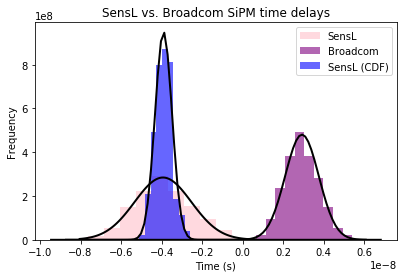

Difference in time delay std:  0.572 ns


In [48]:
sensl_120 = pd.read_csv('sensLsipmtimingmethods/sensL sipm delays 120 cm/SNSL_sipm_delay_120_3.csv')
broadcom_120 = pd.read_csv("SGB BCF 9929 1-2/XaM_DEL_SGB-BCF-1-2_R6.csv")
sensl_trace_120 = get_timing_delays_trace('sensLsipmtimingmethods/sensL sipm delays 120 cm/SNSL_sipm_trace_120_3', 20, 0.7, plot=False)



sensl_delays_120 = histogramCalc(sensl_120, 1200, 3000, False)
broadcom_delays_120 = histogramCalc(broadcom_120, 1200, 3000, False)
comparison_plot(sensl_delays_120, broadcom_delays_120,sensl_trace_120)